# Modules Importation and File Reading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt, time

file_location = r"C:\Users\Hp\Documents\EDA Kaggle\upi_transactions_2024.csv"

In [2]:
df = pd.read_csv(file_location)
df

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,TXN0000249996,2024-11-08 22:41:43,Recharge,Food,373,SUCCESS,36-45,26-35,Telangana,ICICI,HDFC,iOS,5G,0,22,Friday,0
249996,TXN0000249997,2024-12-15 02:58:03,P2P,Utilities,2025,SUCCESS,36-45,26-35,Rajasthan,HDFC,Yes Bank,Android,5G,0,2,Sunday,1
249997,TXN0000249998,2024-11-27 16:33:25,P2P,Food,468,SUCCESS,26-35,18-25,West Bengal,ICICI,ICICI,Android,4G,0,16,Wednesday,0
249998,TXN0000249999,2024-01-05 13:31:30,Recharge,Healthcare,284,SUCCESS,18-25,36-45,Andhra Pradesh,Axis,ICICI,iOS,4G,0,13,Friday,0


# Understanding the Data and Cleaning it

In [3]:
df.info()
df.describe()
df.nunique()

# Align the dtypes for timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

transaction id        250000
timestamp             248610
transaction type           4
merchant_category         10
amount (INR)           10355
transaction_status         2
sender_age_group           5
receiver_age_group         5
sender_state              10
sender_bank                8
receiver_bank              8
device_type                3
network_type               4
fraud_flag                 2
hour_of_day               24
day_of_week                7
is_weekend                 2
dtype: int64

In [4]:
# Drop any duplicated rows
df2 = df
df2.drop_duplicates(inplace=True)
# No duplicated values in our dataset
# Reformat the dtypes
df2.timestamp = pd.to_datetime(df2.timestamp)
df2.head()

df2.info()
# check if we have the right hour of day when compared to the hour found in the timestamp
df2.spending_hour = df2.timestamp.dt.hour
df2["transaction id"].loc[df2.hour_of_day != df2.spending_hour]
# No error found in hour_of_day in relation to the timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction id      250000 non-null  object        
 1   timestamp           250000 non-null  datetime64[ns]
 2   transaction type    250000 non-null  object        
 3   merchant_category   250000 non-null  object        
 4   amount (INR)        250000 non-null  int64         
 5   transaction_status  250000 non-null  object        
 6   sender_age_group    250000 non-null  object        
 7   receiver_age_group  250000 non-null  object        
 8   sender_state        250000 non-null  object        
 9   sender_bank         250000 non-null  object        
 10  receiver_bank       250000 non-null  object        
 11  device_type         250000 non-null  object        
 12  network_type        250000 non-null  object        
 13  fraud_flag          250000 no

C:\Users\Hp\AppData\Local\Temp\ipykernel_11624\1299754390.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2.spending_hour = df2.timestamp.dt.hour


Series([], Name: transaction id, dtype: object)

# Data Exploration

In [5]:
# Failed Transactions
# Flagged Fraud Transactions
df3 = df2
failed_transactions = df3[df3["transaction_status"] != "SUCCESS"].reset_index(drop=True)
failed_transactions["transaction id"].count()
# 12376 transactions failed
flagged_transactions = df3[df3["fraud_flag"] == 1].reset_index(drop=True)
flagged_transactions["transaction id"].count()
# 480 flagged transactions


480

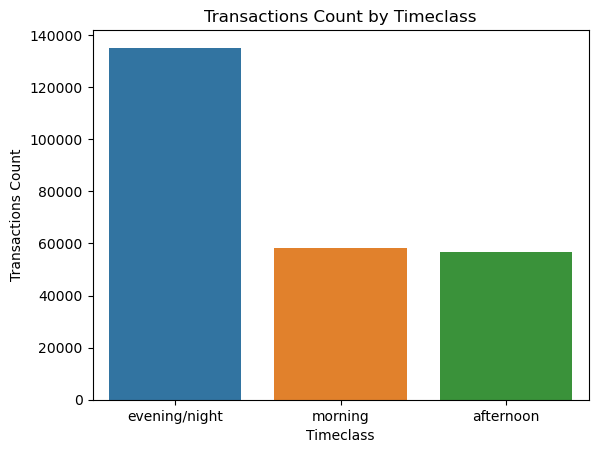

In [6]:
# Consumer Analytics: Analyze spending patterns by time, category, and demographics. "Morning, Afternoon, Evening/Night"
morning = time(6, 0, 0)
afternoon = time(12, 0, 0)
evening_night = time(16, 0, 0)


def classify_time(t):
    t = t.time()  # Extract time from datetime
    if morning <= t < afternoon:
        return 'morning'
    elif afternoon <= t < evening_night:
        return 'afternoon'
    else:
        return 'evening/night'


df3["spending_timeclass"] = df3['timestamp'].apply(classify_time)
transaction_count_by_timeclass = df3[['transaction id', 'spending_timeclass']].groupby("spending_timeclass", as_index=False).count()
# df3.columns
transaction_count_by_timeclass.sort_values("transaction id", ascending=False, inplace=True)
sns.barplot(data=transaction_count_by_timeclass, x="spending_timeclass", y="transaction id", hue="spending_timeclass")
plt.ylabel("Transactions Count")
plt.xlabel("Timeclass")
plt.title("Transactions Count by Timeclass")
_ = plt.xticks(rotation=0)

<Axes: xlabel='spending_timeclass', ylabel='amount (INR)'>

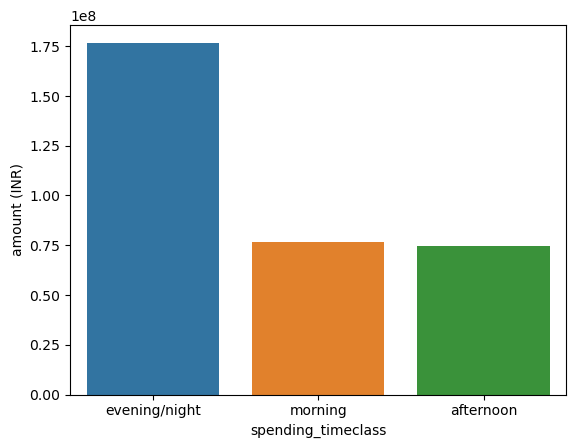

In [7]:
sum_by_timeclass = df3[['amount (INR)', 'spending_timeclass']].groupby("spending_timeclass").sum().sort_values('amount (INR)', ascending=False)
# df3.columns
sns.barplot(data=sum_by_timeclass, x="spending_timeclass", y="amount (INR)", hue="spending_timeclass")



In [8]:
df4 = df3[['transaction id', 'amount (INR)', 'spending_timeclass', "merchant_category", 'transaction type']]
shopped_categories_by_timeclass = df4.groupby(['spending_timeclass', "merchant_category"], as_index=False).sum(numeric_only=True).sort_values(["spending_timeclass", "amount (INR)"], ascending=[False, False])
shopped_categories_by_timeclass = shopped_categories_by_timeclass.pivot(index="spending_timeclass", columns="merchant_category", values='amount (INR)')

shopped_categories_by_timeclass

merchant_category,Education,Entertainment,Food,Fuel,Grocery,Healthcare,Other,Shopping,Transport,Utilities
spending_timeclass,,,,,,,,,,
afternoon,8703191,1910243,4500851,8933365,13116829,1543736,4778425,17735582,1399241,12139401
evening/night,21087781,4500620,10782171,20880221,31428864,3730540,11488789,41334244,3351442,28174564
morning,8913374,1898217,4636380,9168989,13732200,1599883,4806235,17793381,1441733,12428517


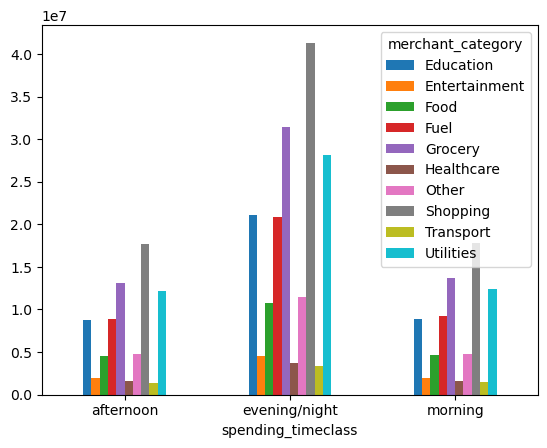

In [9]:
shopped_categories_by_timeclass.plot(kind="bar")
_ = plt.xticks(rotation=0)
# Shopping tops in the three defined times of day, followed by grocery

In [10]:
df2.columns

Index(['transaction id', 'timestamp', 'transaction type', 'merchant_category',
       'amount (INR)', 'transaction_status', 'sender_age_group',
       'receiver_age_group', 'sender_state', 'sender_bank', 'receiver_bank',
       'device_type', 'network_type', 'fraud_flag', 'hour_of_day',
       'day_of_week', 'is_weekend', 'spending_timeclass'],
      dtype='object')

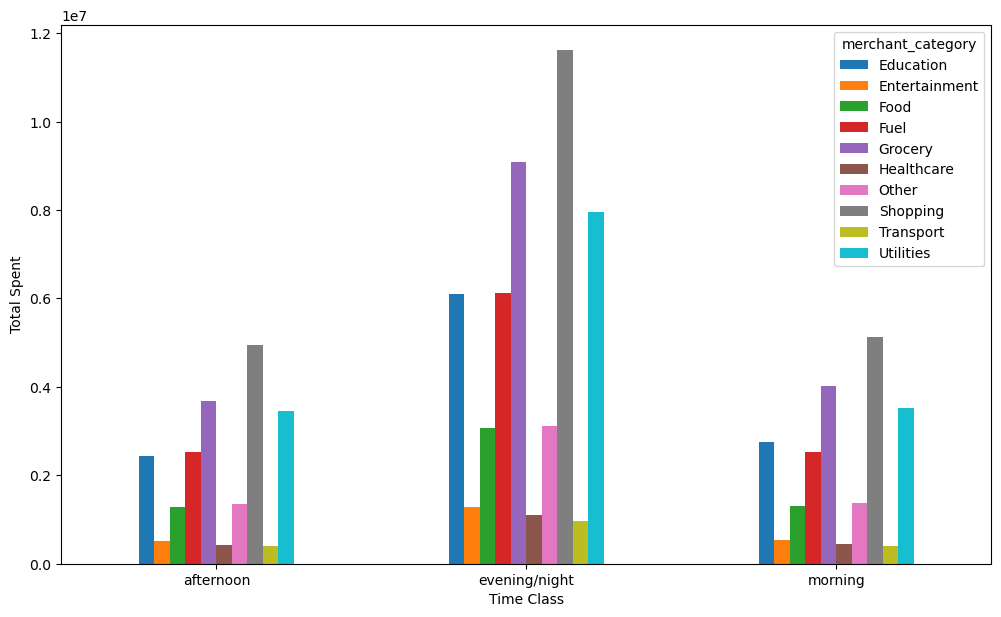

In [11]:
df5 = df3[['transaction id', 'amount (INR)', 'spending_timeclass', "merchant_category", 'transaction type', "is_weekend"]]
# weekend spending
weekends_data = df5[df5.is_weekend == 1]
weekends_spending = weekends_data[["spending_timeclass", "merchant_category", 'amount (INR)']].groupby(["spending_timeclass", "merchant_category"], as_index=False).sum(numeric_only=True)
weekends_spending.pivot(index="spending_timeclass", columns="merchant_category", values='amount (INR)').plot(kind="bar", figsize=(12, 7), ylabel="Total Spent", xlabel="Time Class")
_ = plt.xticks(rotation=0)


<Axes: xlabel='month'>

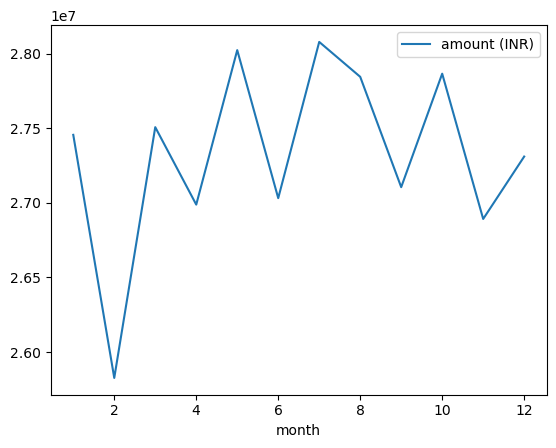

In [12]:
# monthly spend
df6 = df3
df6.columns
# df6["year"] = df6.timestamp.dt.year
df6["month"] = df6.timestamp.dt.month
df6[['transaction id', 'amount (INR)', 'month']].groupby("month").sum(numeric_only=True).plot(kind="line")

<Axes: title={'center': 'General Phone Type Usage'}>

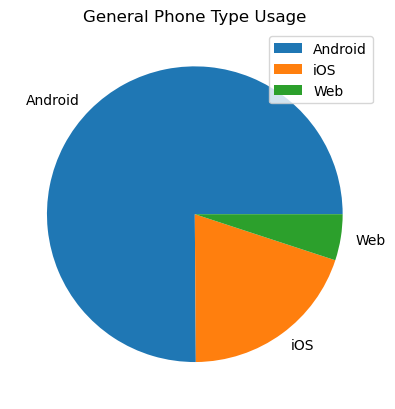

In [13]:
device_type_usage = df6[["device_type", 'transaction id']].groupby("device_type", as_index=False).count().sort_values("transaction id", ascending=False)
# Most transactions are made through Android devices
# df6.columns
device_type_usage.set_index("device_type").plot(kind="pie", y="transaction id", ylabel="", title="General Phone Type Usage")


<Axes: title={'center': 'General Network Usage Across All Devices'}>

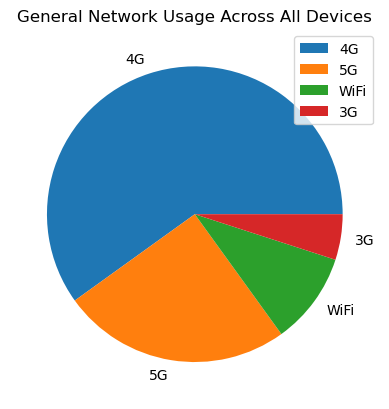

In [14]:
network_type_usage = df6[["device_type", 'transaction id', 'network_type']].groupby("network_type").count().sort_values("transaction id", ascending=False)
network_type_usage.plot(kind="pie", y="transaction id", ylabel="", title="General Network Usage Across All Devices")


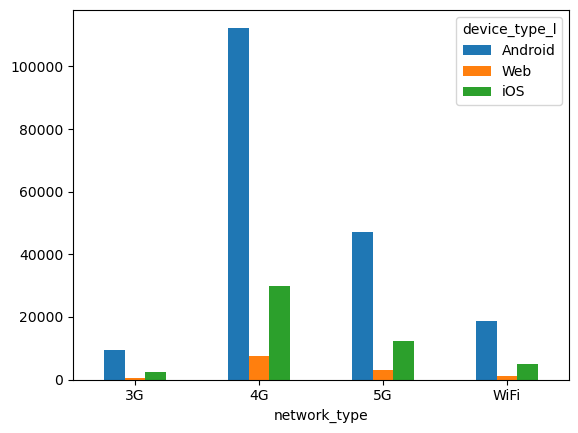

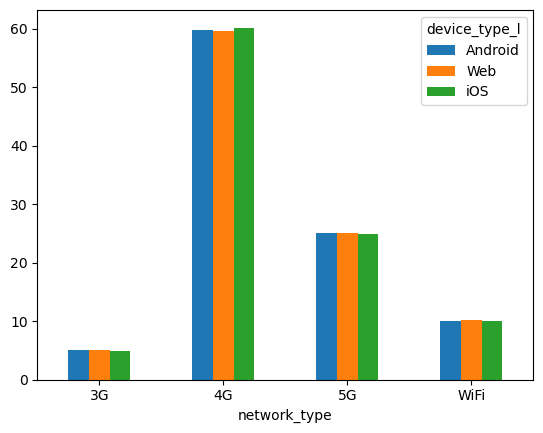

In [15]:
devices_and_networks = df6[['transaction id', 'device_type', 'network_type']].groupby(['device_type', "network_type"], as_index=False).count().sort_values("transaction id", ascending=False)
# devices_and_networks.pivot(index="device_type", values="transaction id", columns="network_type")
merged_df = devices_and_networks.merge(device_type_usage, how='cross', suffixes=("_l", "_r"))
merged_df = merged_df[merged_df["device_type_l"] == merged_df["device_type_r"]]
merged_df["% Usage"] = round((merged_df["transaction id_l"]/merged_df["transaction id_r"])*100, 2)
percentage_device_network_usage = merged_df[["device_type_l", "network_type", "transaction id_l", "% Usage"]].reset_index(drop=True)
percentage_device_network_usage1 = percentage_device_network_usage.sort_values(["device_type_l", "transaction id_l"], ascending=[True, False]).pivot(index="network_type", columns="device_type_l", values="transaction id_l")
percentage_device_network_usage1.plot(kind="bar")
_ = plt.xticks(rotation=0)
percentage_device_network_usage2 = percentage_device_network_usage.sort_values(["device_type_l", "transaction id_l"], ascending=[True, False]).pivot(index="network_type", columns="device_type_l", values="% Usage")
percentage_device_network_usage2.plot(kind="bar")
_ = plt.xticks(rotation=0)